In [ ]:
# === Librerías del sistema ===
import os
import shutil
import math
import hashlib

# === Manejo y visualización de imágenes ===
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# === NumPy ===
import numpy as np

# === Scikit-learn ===
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# === TensorFlow y Keras ===
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Gradio ===
import gradio as gr


In [11]:
base_dir = "Garbage_classification"

# Solo carpetas válidas que contienen imágenes
classes = [
    cls for cls in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, cls)) and
    len(os.listdir(os.path.join(base_dir, cls))) > 0
]

print(f"Clases válidas: {classes}")

for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    num_imgs = len([img for img in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, img))])
    print(f"{cls}: {num_imgs} imágenes") 

Clases válidas: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
cardboard: 403 imágenes
glass: 501 imágenes
metal: 410 imágenes
paper: 594 imágenes
plastic: 482 imágenes
trash: 137 imágenes


In [ ]:
# --- CONFIGURACIÓN ---
carpeta_principal = "Garbage_classification"
carpeta_nuevas = "Nuevas"
carpeta_destino = "dataset_final"

# --- CALCULAR HASH DE IMAGEN ---
def calcular_hash(path_img):
    try:
        with Image.open(path_img) as img:
            img = img.resize((64, 64)).convert("RGB")
            return hashlib.md5(img.tobytes()).hexdigest()
    except:
        return None

# --- COPIAR SIN DUPLICADOS ---
def copiar_sin_duplicados(origen, destino, hashes_existentes):
    for clase in os.listdir(origen):
        ruta_clase_origen = os.path.join(origen, clase)
        ruta_clase_destino = os.path.join(destino, clase)

        if os.path.isdir(ruta_clase_origen):
            os.makedirs(ruta_clase_destino, exist_ok=True)

            for img_name in os.listdir(ruta_clase_origen):
                ruta_img = os.path.join(ruta_clase_origen, img_name)

                if os.path.isfile(ruta_img):
                    hash_img = calcular_hash(ruta_img)
                    if hash_img and hash_img not in hashes_existentes:
                        shutil.copy2(ruta_img, os.path.join(ruta_clase_destino, img_name))
                        hashes_existentes.add(hash_img)

# --- CREAR CARPETA DESTINO Y COPIAR ---
os.makedirs(carpeta_destino, exist_ok=True)
hashes = set()

copiar_sin_duplicados(carpeta_principal, carpeta_destino, hashes)

copiar_sin_duplicados(carpeta_nuevas, carpeta_destino, hashes)

# --- MOSTRAR RESULTADOS FINALES ---
print("\n📊 Imágenes por clase en dataset_final:")
for clase in os.listdir(carpeta_destino):
    ruta_clase = os.path.join(carpeta_destino, clase)
    if os.path.isdir(ruta_clase):
        total = len([f for f in os.listdir(ruta_clase) if os.path.isfile(os.path.join(ruta_clase, f))])
        print(f"✅ {clase}: {total} imágenes")


📥 Copiando desde carpeta principal...
📥 Copiando desde carpeta nuevas (omitirá duplicados)...

📊 Imágenes por clase en dataset_final:
✅ cardboard: 833 imágenes
✅ glass: 2024 imágenes
✅ metal: 717 imágenes
✅ paper: 639 imágenes
✅ plastic: 782 imágenes
✅ trash: 697 imágenes


In [ ]:
base_dir = "dataset_final"  # <-- tu dataset combinado limpio
dir = os.getcwd()

train_dir = os.path.join(dir, 'Classification/train')
val_dir = os.path.join(dir, 'Classification/val')
test_dir = os.path.join(dir, 'Classification/test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Solo carpetas válidas
classes = [cls for cls in os.listdir(base_dir)
           if os.path.isdir(os.path.join(base_dir, cls)) and
           len(os.listdir(os.path.join(base_dir, cls))) > 0]

total_train = 0
total_val = 0
total_test = 0

for cls in classes:
    cls_path = os.path.join(base_dir, cls)

    all_imgs = [img for img in os.listdir(cls_path)
                if os.path.isfile(os.path.join(cls_path, img))]

    if len(all_imgs) == 0:
        print(f"⚠️ Clase '{cls}' ignorada: no tiene imágenes.")
        continue

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    train_imgs, temp_imgs = train_test_split(all_imgs, test_size=0.4, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(val_dir, cls, img))
    for img in test_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(test_dir, cls, img))

    # Mostrar conteo por clase
    print(f"Clase '{cls}':")
    print(f"   🟩 Train: {len(train_imgs)}")
    print(f"   🟨 Val  : {len(val_imgs)}")
    print(f"   🟥 Test : {len(test_imgs)}")

    total_train += len(train_imgs)
    total_val += len(val_imgs)
    total_test += len(test_imgs)

# Mostrar totales globales
print("\n📊 Totales generales:")
print(f"🟩 Total Train: {total_train}")
print(f"🟨 Total Val  : {total_val}")
print(f"🟥 Total Test : {total_test}")


📦 Clase 'cardboard':
   🟩 Train: 499
   🟨 Val  : 167
   🟥 Test : 167
📦 Clase 'glass':
   🟩 Train: 1214
   🟨 Val  : 405
   🟥 Test : 405
📦 Clase 'metal':
   🟩 Train: 430
   🟨 Val  : 143
   🟥 Test : 144
📦 Clase 'paper':
   🟩 Train: 383
   🟨 Val  : 128
   🟥 Test : 128
📦 Clase 'plastic':
   🟩 Train: 469
   🟨 Val  : 156
   🟥 Test : 157
📦 Clase 'trash':
   🟩 Train: 418
   🟨 Val  : 139
   🟥 Test : 140

📊 Totales generales:
🟩 Total Train: 3413
🟨 Total Val  : 1138
🟥 Total Test : 1141


In [18]:

image_size = (224, 224)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               horizontal_flip=True)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='categorical')

val_data = val_gen.flow_from_directory(val_dir,
                                       target_size=image_size,
                                       batch_size=batch_size,
                                       class_mode='categorical')

test_data = val_gen.flow_from_directory(test_dir,
                                        target_size=image_size,
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False)


Found 3965 images belonging to 6 classes.
Found 1528 images belonging to 6 classes.
Found 1518 images belonging to 6 classes.


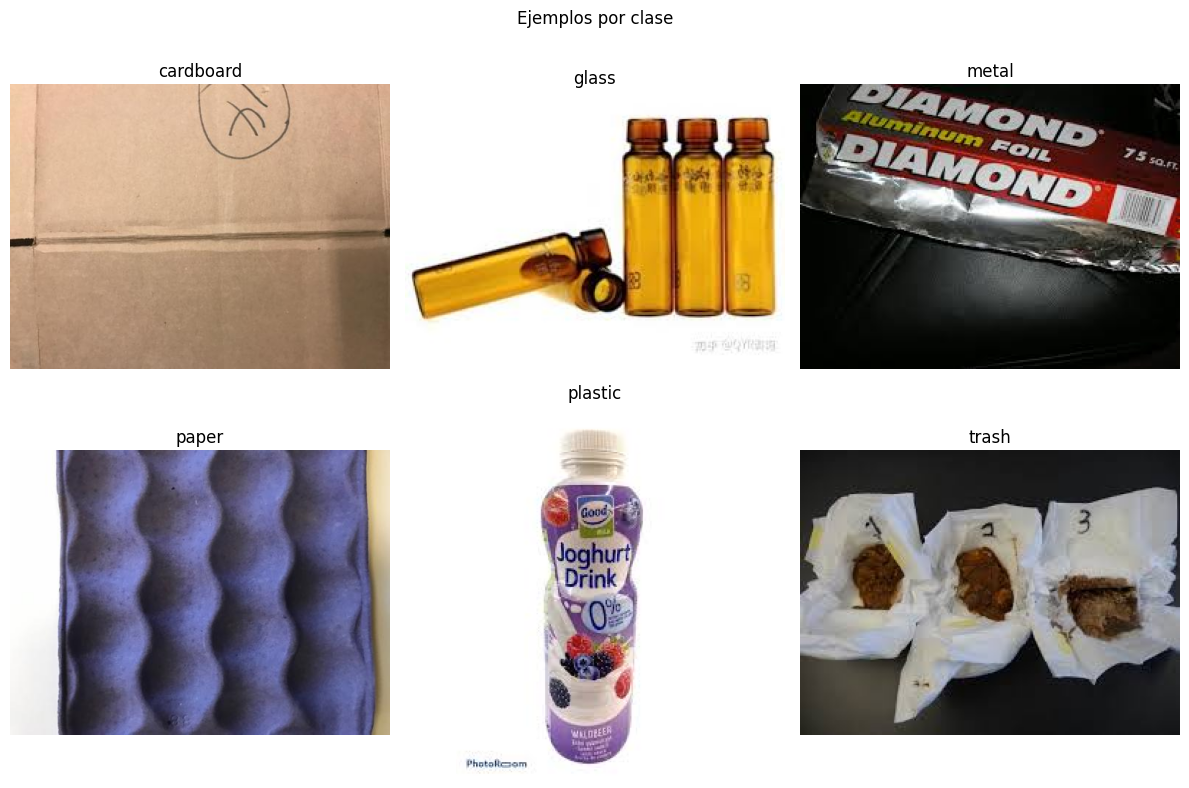

In [23]:
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
cols = 3  # Puedes ajustar si quieres más o menos columnas
rows = math.ceil(num_classes / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
fig.suptitle('Ejemplos por clase')

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    sample_image = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, sample_image)
    img = mpimg.imread(img_path)

    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# Ocultar los subgráficos vacíos si hay
total_plots = rows * cols
for j in range(num_classes, total_plots):
    ax = axes[j // cols, j % cols] if rows > 1 else axes[j % cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [24]:


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')  # Corrección aquí
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=30,
                    validation_data=val_data)


c:\Users\Bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 109s 873ms/step - accuracy: 0.3495 - loss: 1.8539 - val_accuracy: 0.4895 - val_loss: 1.2811
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 53s 429ms/step - accuracy: 0.4786 - loss: 1.3068 - val_accuracy: 0.5452 - val_loss: 1.1861
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 440ms/step - accuracy: 0.5322 - loss: 1.2093 - val_accuracy: 0.5510 - val_loss: 1.1569
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 450ms/step - accuracy: 0.5411 - loss: 1.2007 - val_accuracy: 0.5864 - val_loss: 1.1146
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 59s 478ms/step - accuracy: 0.5676 - loss: 1.1181 - val_accuracy: 0.5648 - val_loss: 1.1752
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 59s 471ms/step - accuracy: 0.5955 - loss: 1.0756 - val_accuracy: 0.6361 - val_loss: 1.0031
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 412ms/step - accuracy: 0.6181 - loss: 1.0215 - val_accuracy: 0.6119 - val_loss: 1.0456
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 55s 441ms/step - accuracy: 0.6260 - loss: 

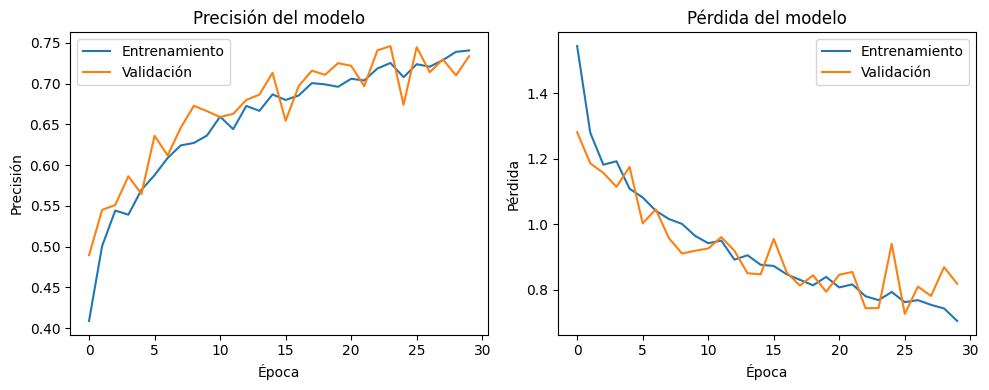

In [ ]:
# === PRECISIÓN ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# === PÉRDIDA ===
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:


# Obtener predicciones del modelo
y_true = []
y_pred = []

# Recorremos todos los batches del val_data
test_data.reset()  # importante para empezar desde el primer batch

for i in range(len(test_data)):
    x_batch, y_batch = test_data[i]
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred_batch = model.predict(x_batch)
    y_pred.extend(np.argmax(y_pred_batch, axis=1))

    if i + 1 == len(test_data):
        break  # evitar overflow si los datos no son exactos

# Etiquetas reales
labels = list(test_data.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━

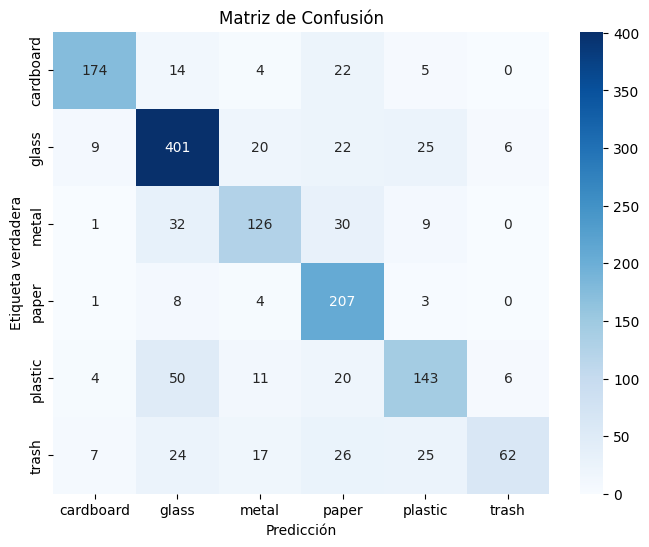

In [29]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


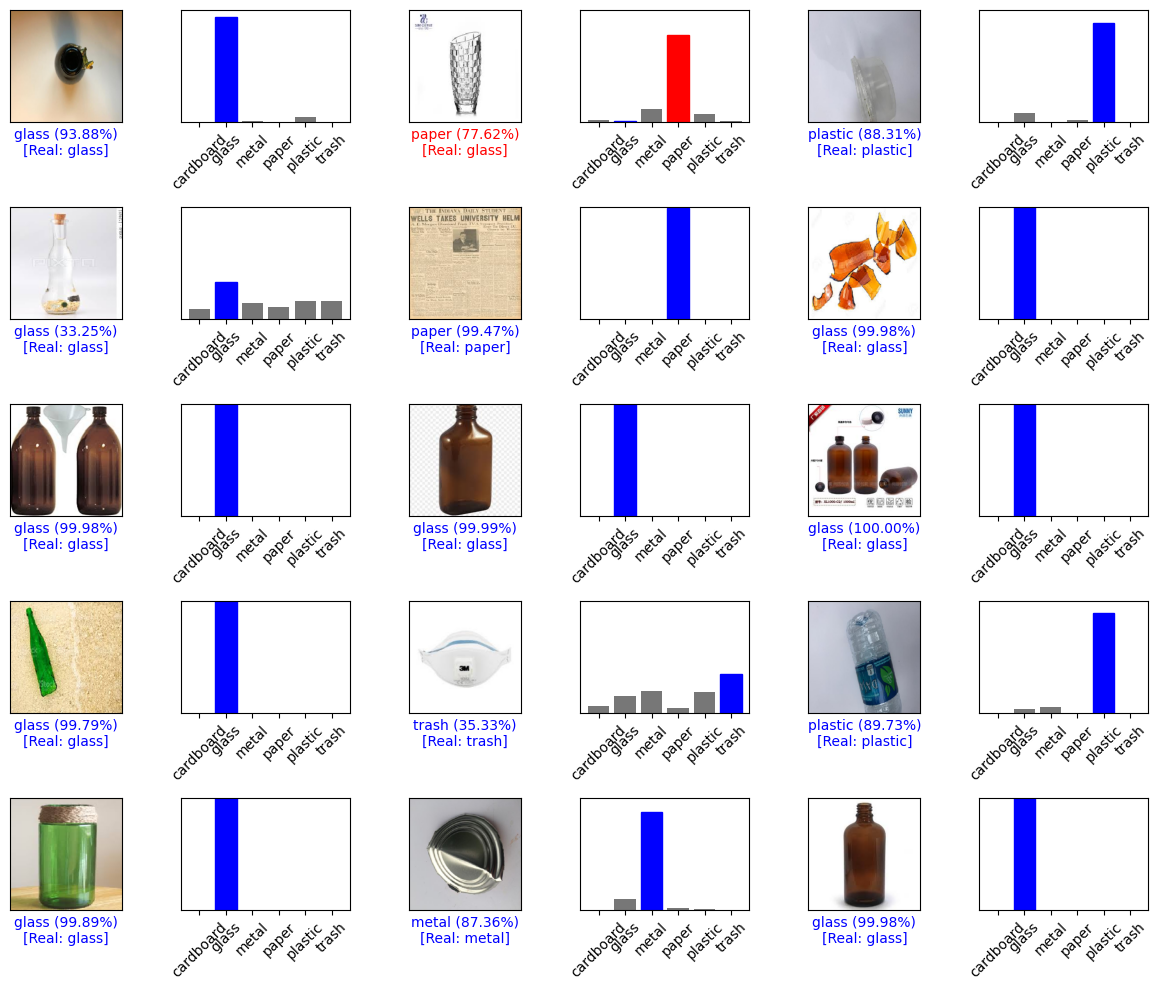

In [32]:
# Obtener una tanda de imágenes de validación (sin mezclar)
val_data.reset()
test_images, test_labels = next(iter(val_data))

# Predecir esas imágenes
predictions = model.predict(test_images)

# Convertir etiquetas codificadas one-hot a índices si es necesario
if test_labels.ndim == 2:
    test_labels = np.argmax(test_labels, axis=1)

# Nombres de las clases (si no lo tenías)
class_names = list(val_data.class_indices.keys())

# Funciones de visualización
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\n[Real: {class_names[true_label]}]", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.yticks([])
    bars = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

# Mostrar imágenes y predicciones
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [33]:


class_indices = train_data.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

def predecir(img):
    img = img.resize((224, 224))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    pred = model.predict(img_array)[0]
    clase = idx_to_class[np.argmax(pred)]
    confianza = np.max(pred)
    return f"{clase} ({confianza:.2%})"

gr.Interface(fn=predecir,
             inputs=gr.Image(type="pil"),
             outputs="text",
             title="Clasificador de Residuos").launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Using existing dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [38]:
model.save('modelo_residuos.h5')